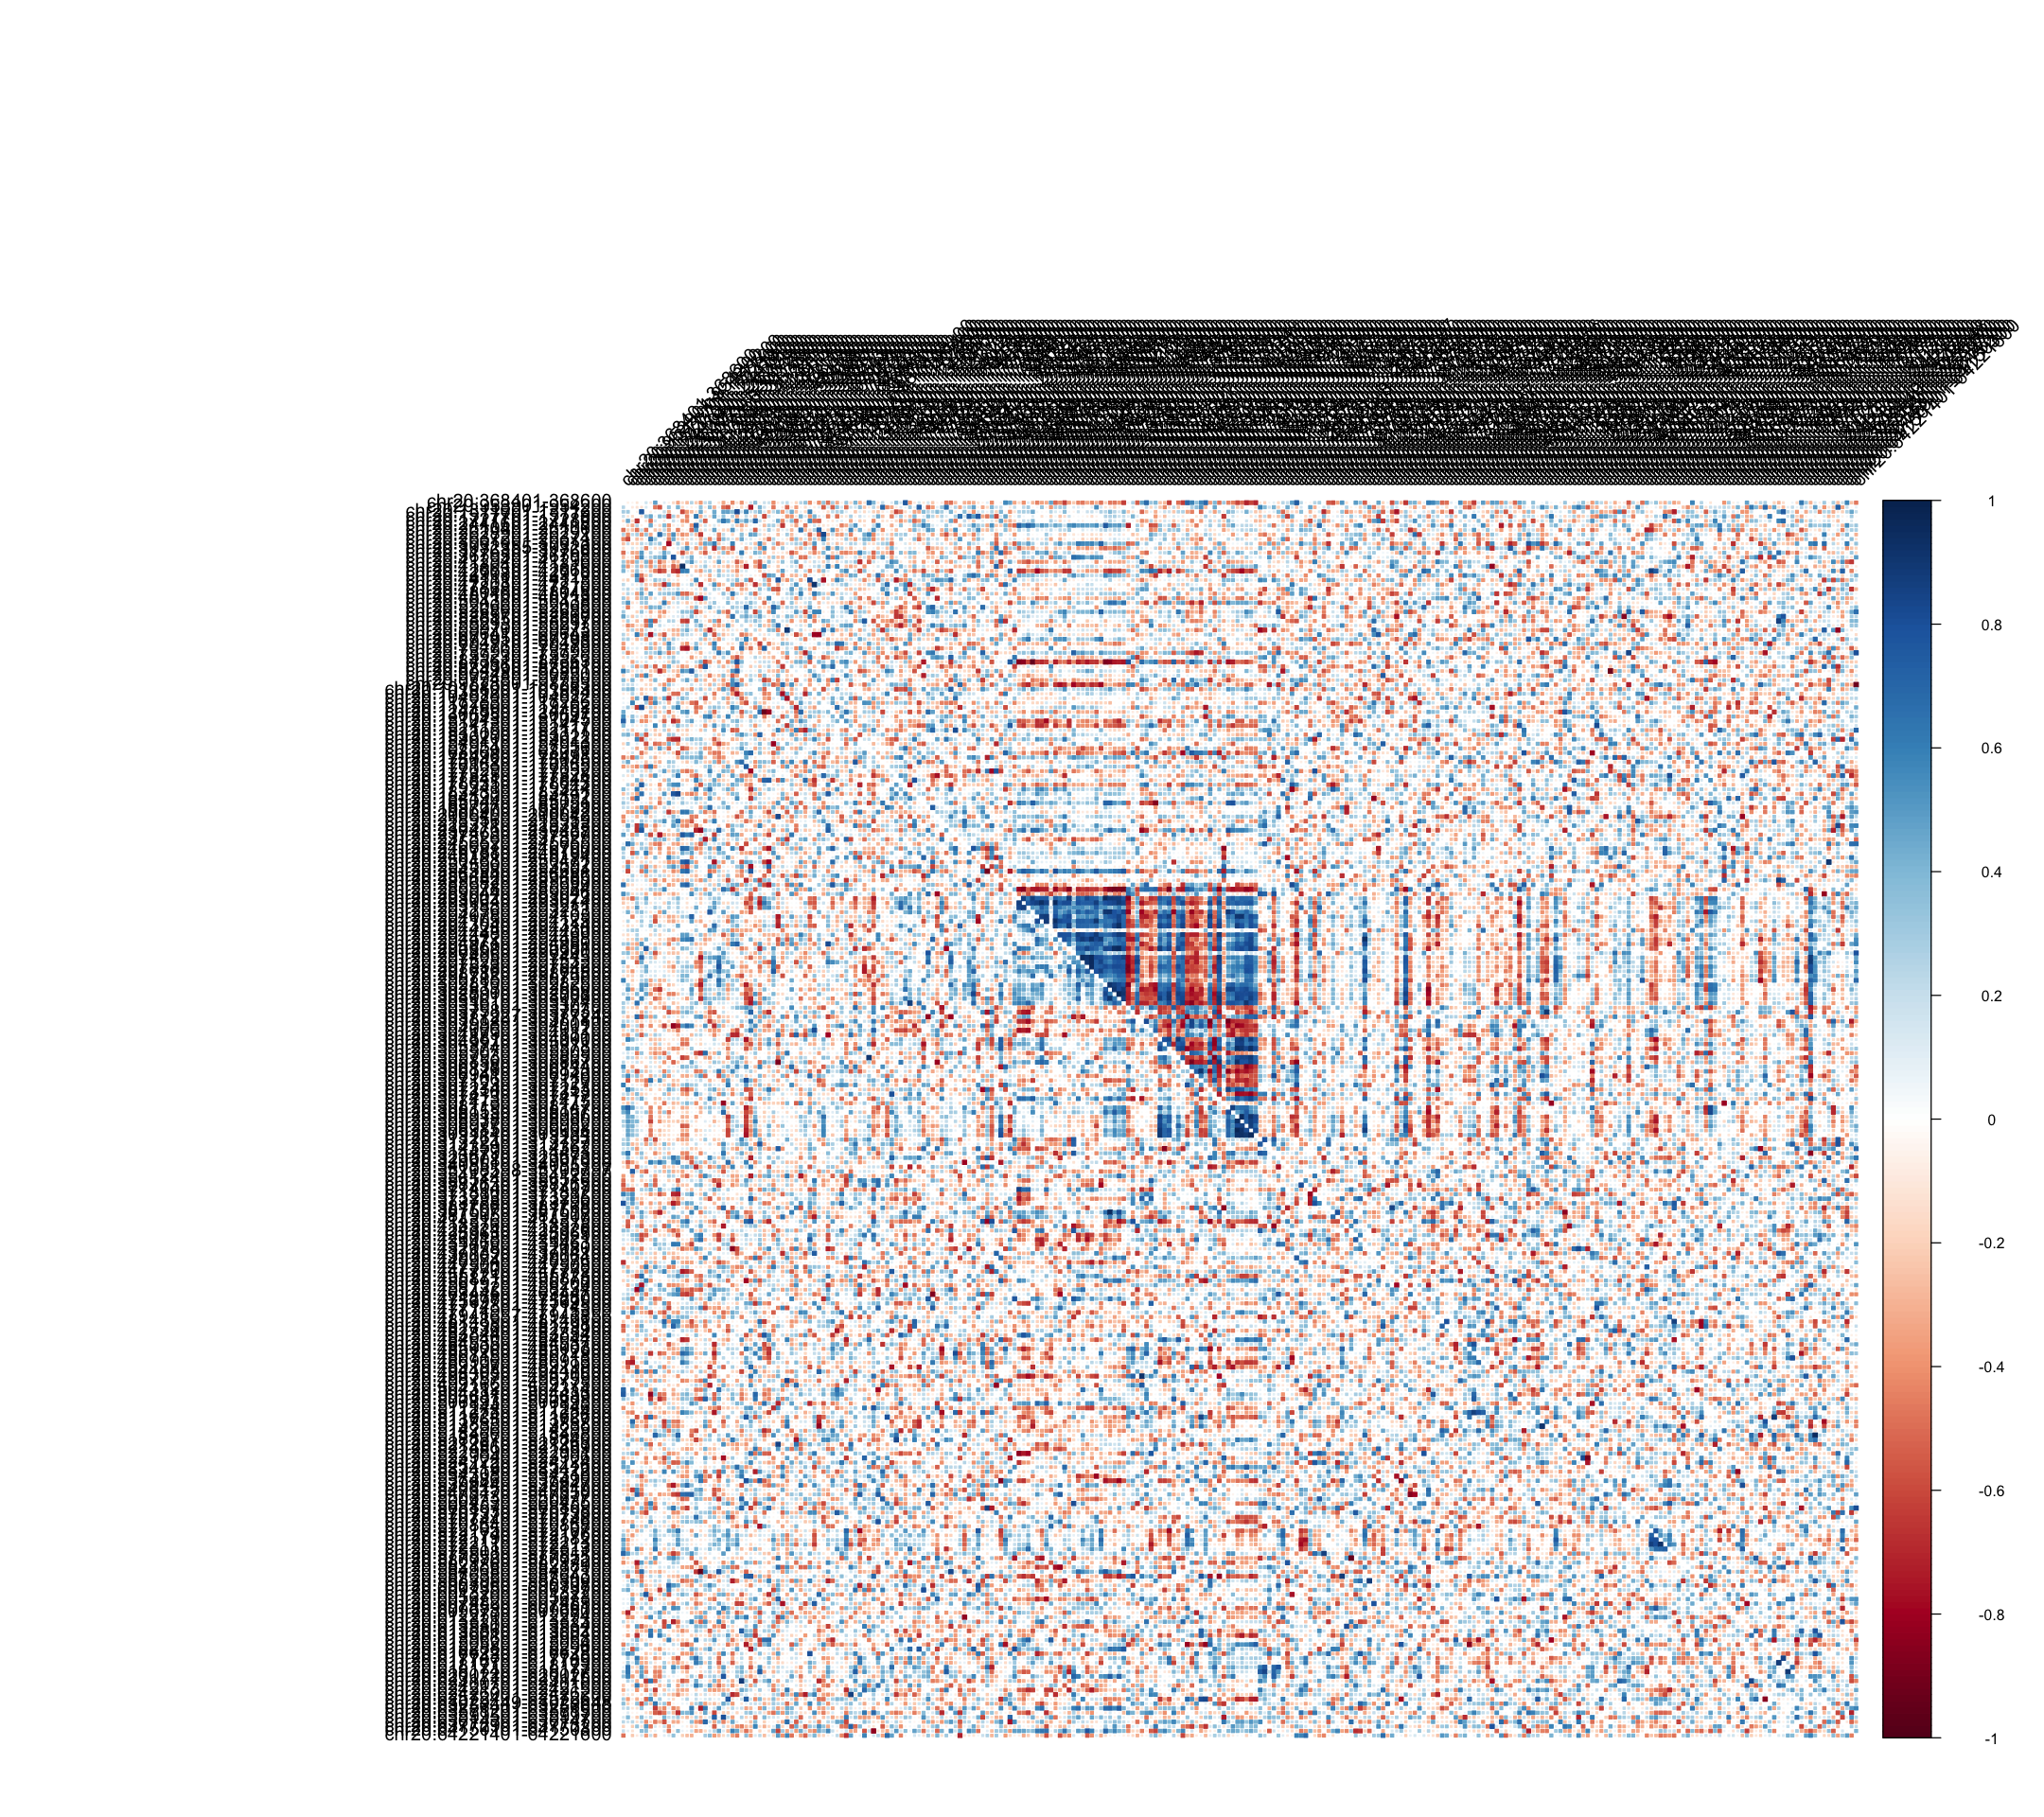

In [8]:
library(corrplot)
library(psych)
#library("PerformanceAnalytics")
corsiv_methy_df_subset <- read.csv("./USC_pediatric_glioma_CoRSIV_Methylation_Data_10x_Depth_.csv",stringsAsFactors = F)

i=20# set chromosome number
corsiv_methy_df_subset_chr <- corsiv_methy_df_subset[corsiv_methy_df_subset$V1==i,]
corsiv_methy_df_subset_chr <- na.omit(corsiv_methy_df_subset_chr)

corsiv_methy_df_subset_chr_control <- corsiv_methy_df_subset_chr[c(2:13,31)]
corsiv_methy_df_subset_chr_case <- corsiv_methy_df_subset_chr[c(14:25,31)]

rownames(corsiv_methy_df_subset_chr_control) <- corsiv_methy_df_subset_chr_control$V5
corsiv_methy_df_subset_chr_control$V5 <- NULL
M_control<-cor(t(corsiv_methy_df_subset_chr_control),use="complete.obs",method = "spearman") 

rownames(corsiv_methy_df_subset_chr_case) <- corsiv_methy_df_subset_chr_case$V5
corsiv_methy_df_subset_chr_case$V5 <- NULL
M_case<-cor(t(corsiv_methy_df_subset_chr_case),use="complete.obs",method = "spearman") 

M_case[lower.tri(M_case,diag = T)] <-0
M_control[upper.tri(M_control,diag = T)] <-0
M <- M_control + M_case

#pdf(file=paste("./pearson_corrplots/USC_Pearson_corrplot_Controls_glioma_Cases_",i,".pdf",sep = ""),family = "Courier",width = 50,height = 50)
#pdf(file=paste("./spearman_corrplots/USC_Spearman_corrplot_Controls_glioma_Cases_",i,".pdf",sep = ""),family = "Courier",width = 50,height = 50)
options(repr.plot.width=18, repr.plot.height=16)
corrplot(M,
         method = "square", tl.cex = 1, tl.col = 'black',
         diag = FALSE,tl.srt=45,addgrid.col = NA,is.corr = FALSE,cl.lim = c(-1,1))#addCoef.col = "black",number.cex = 0.2,



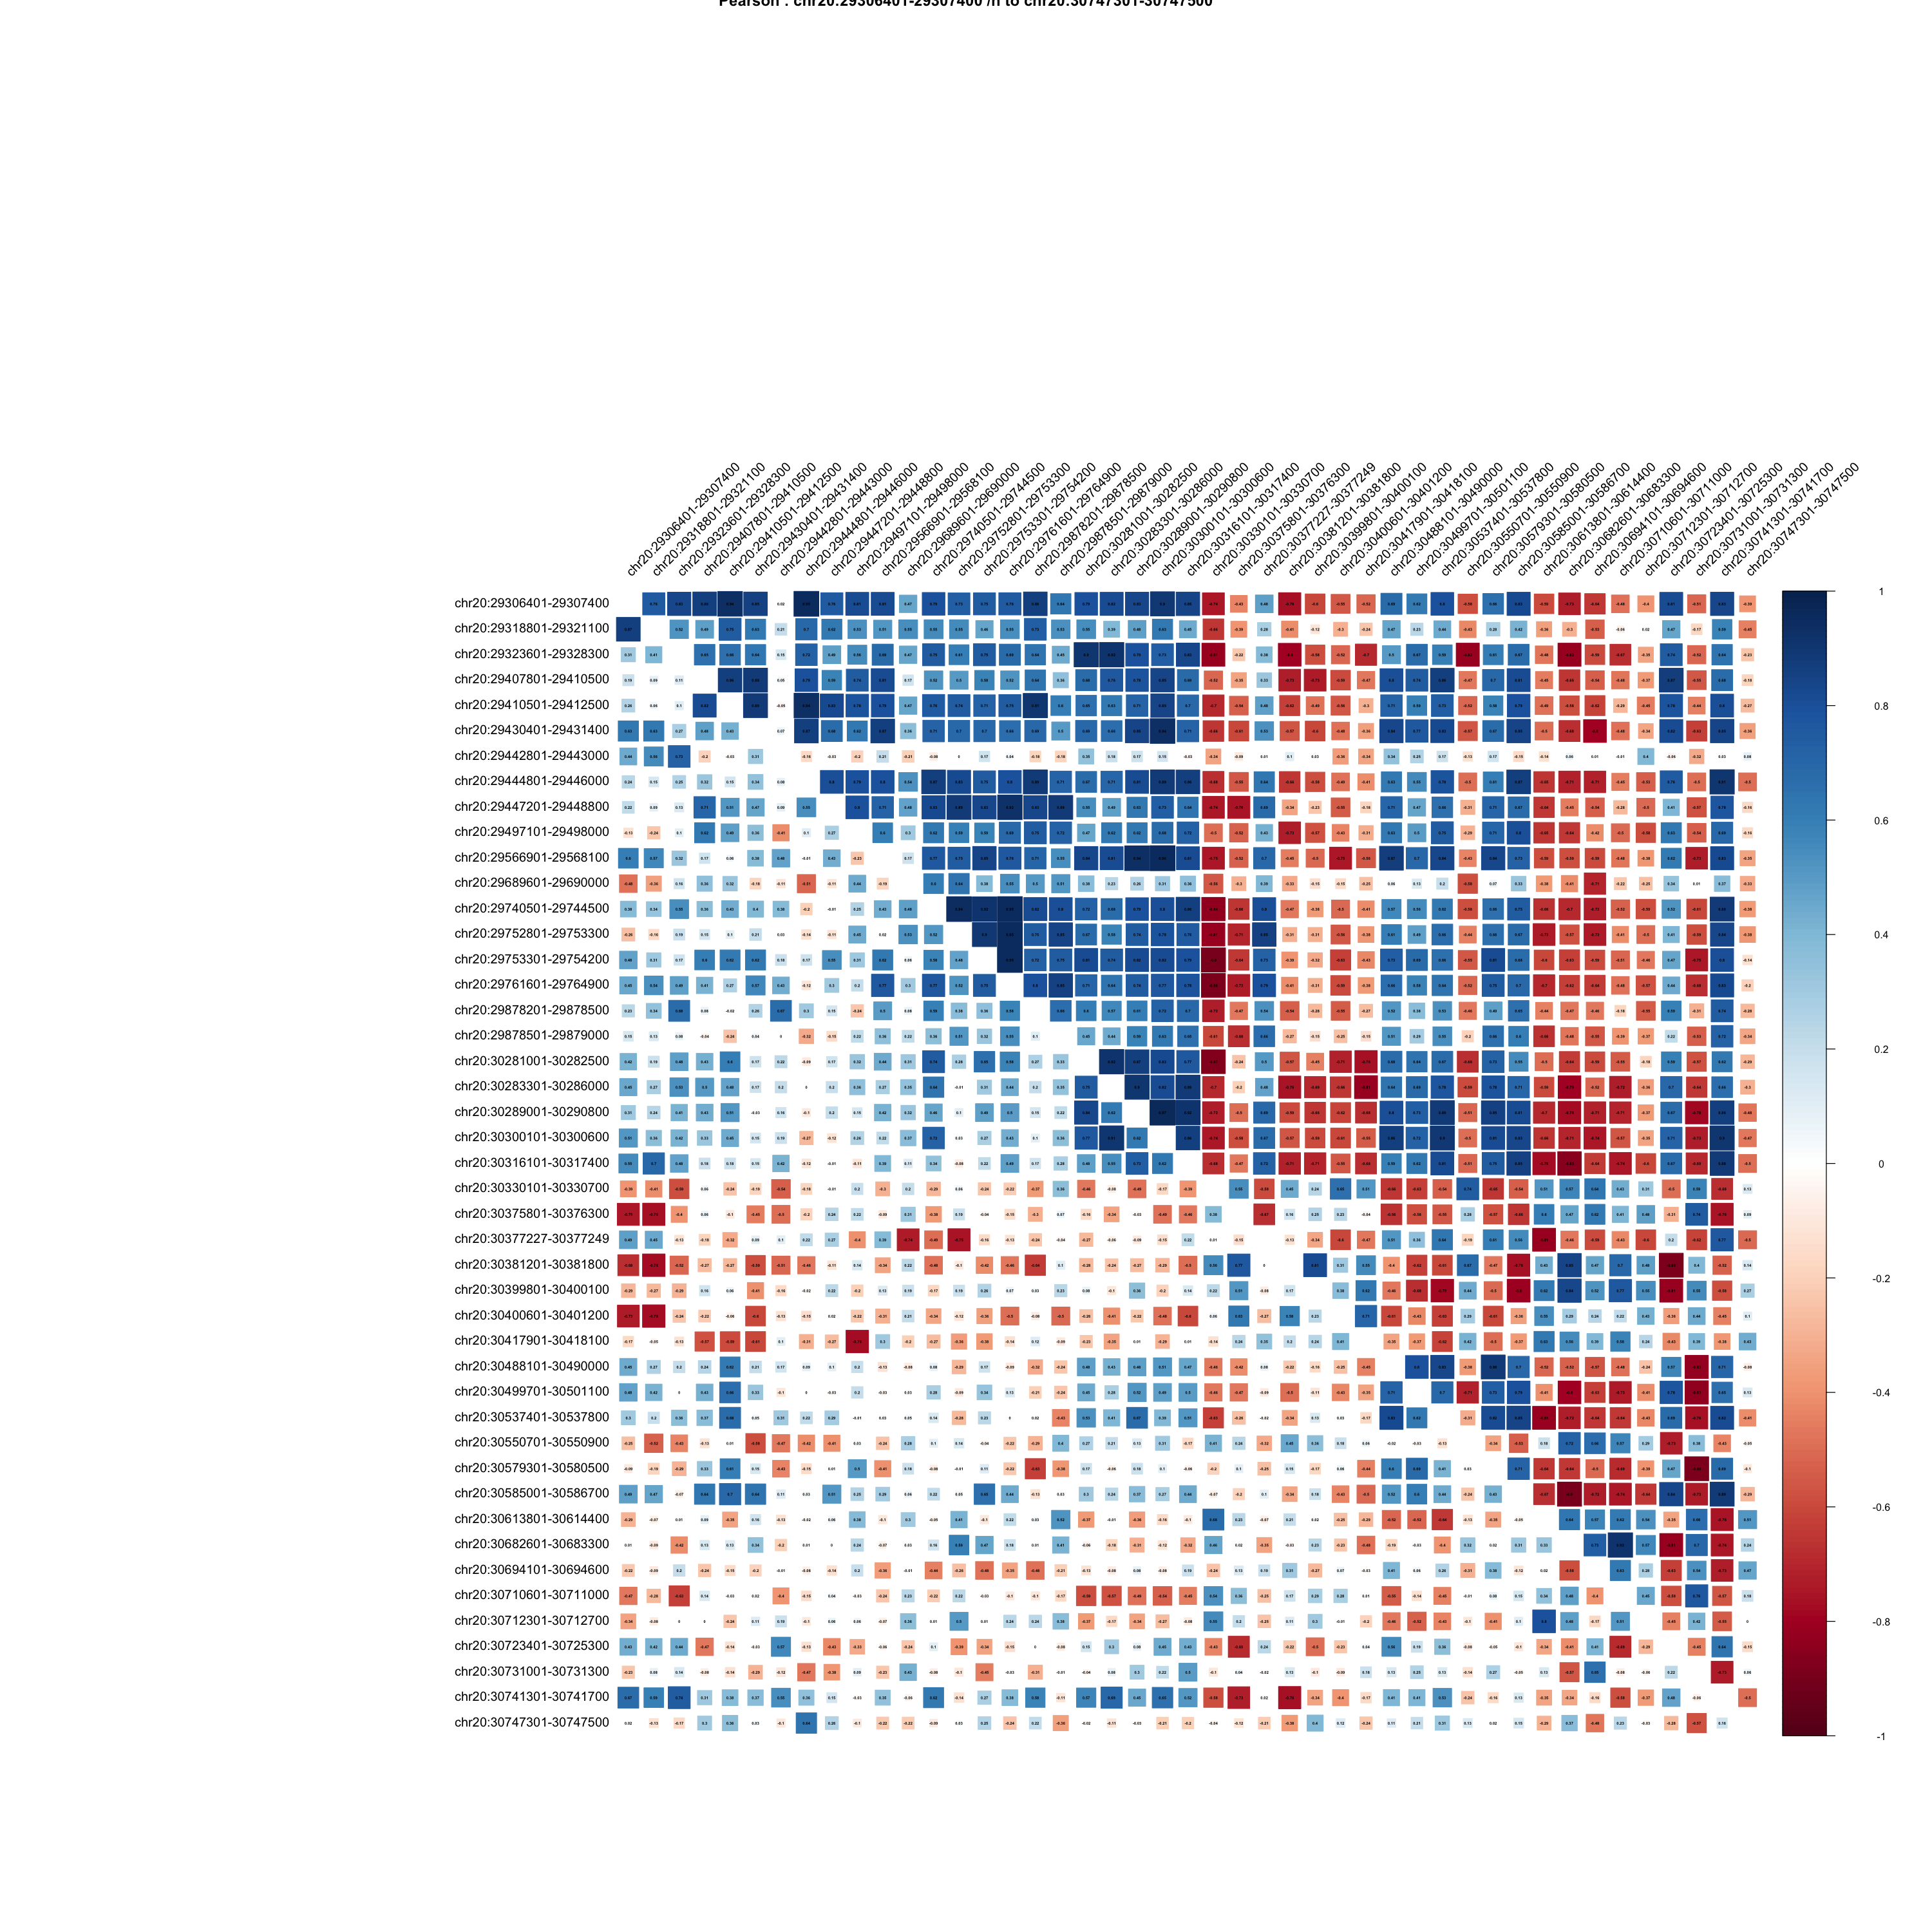

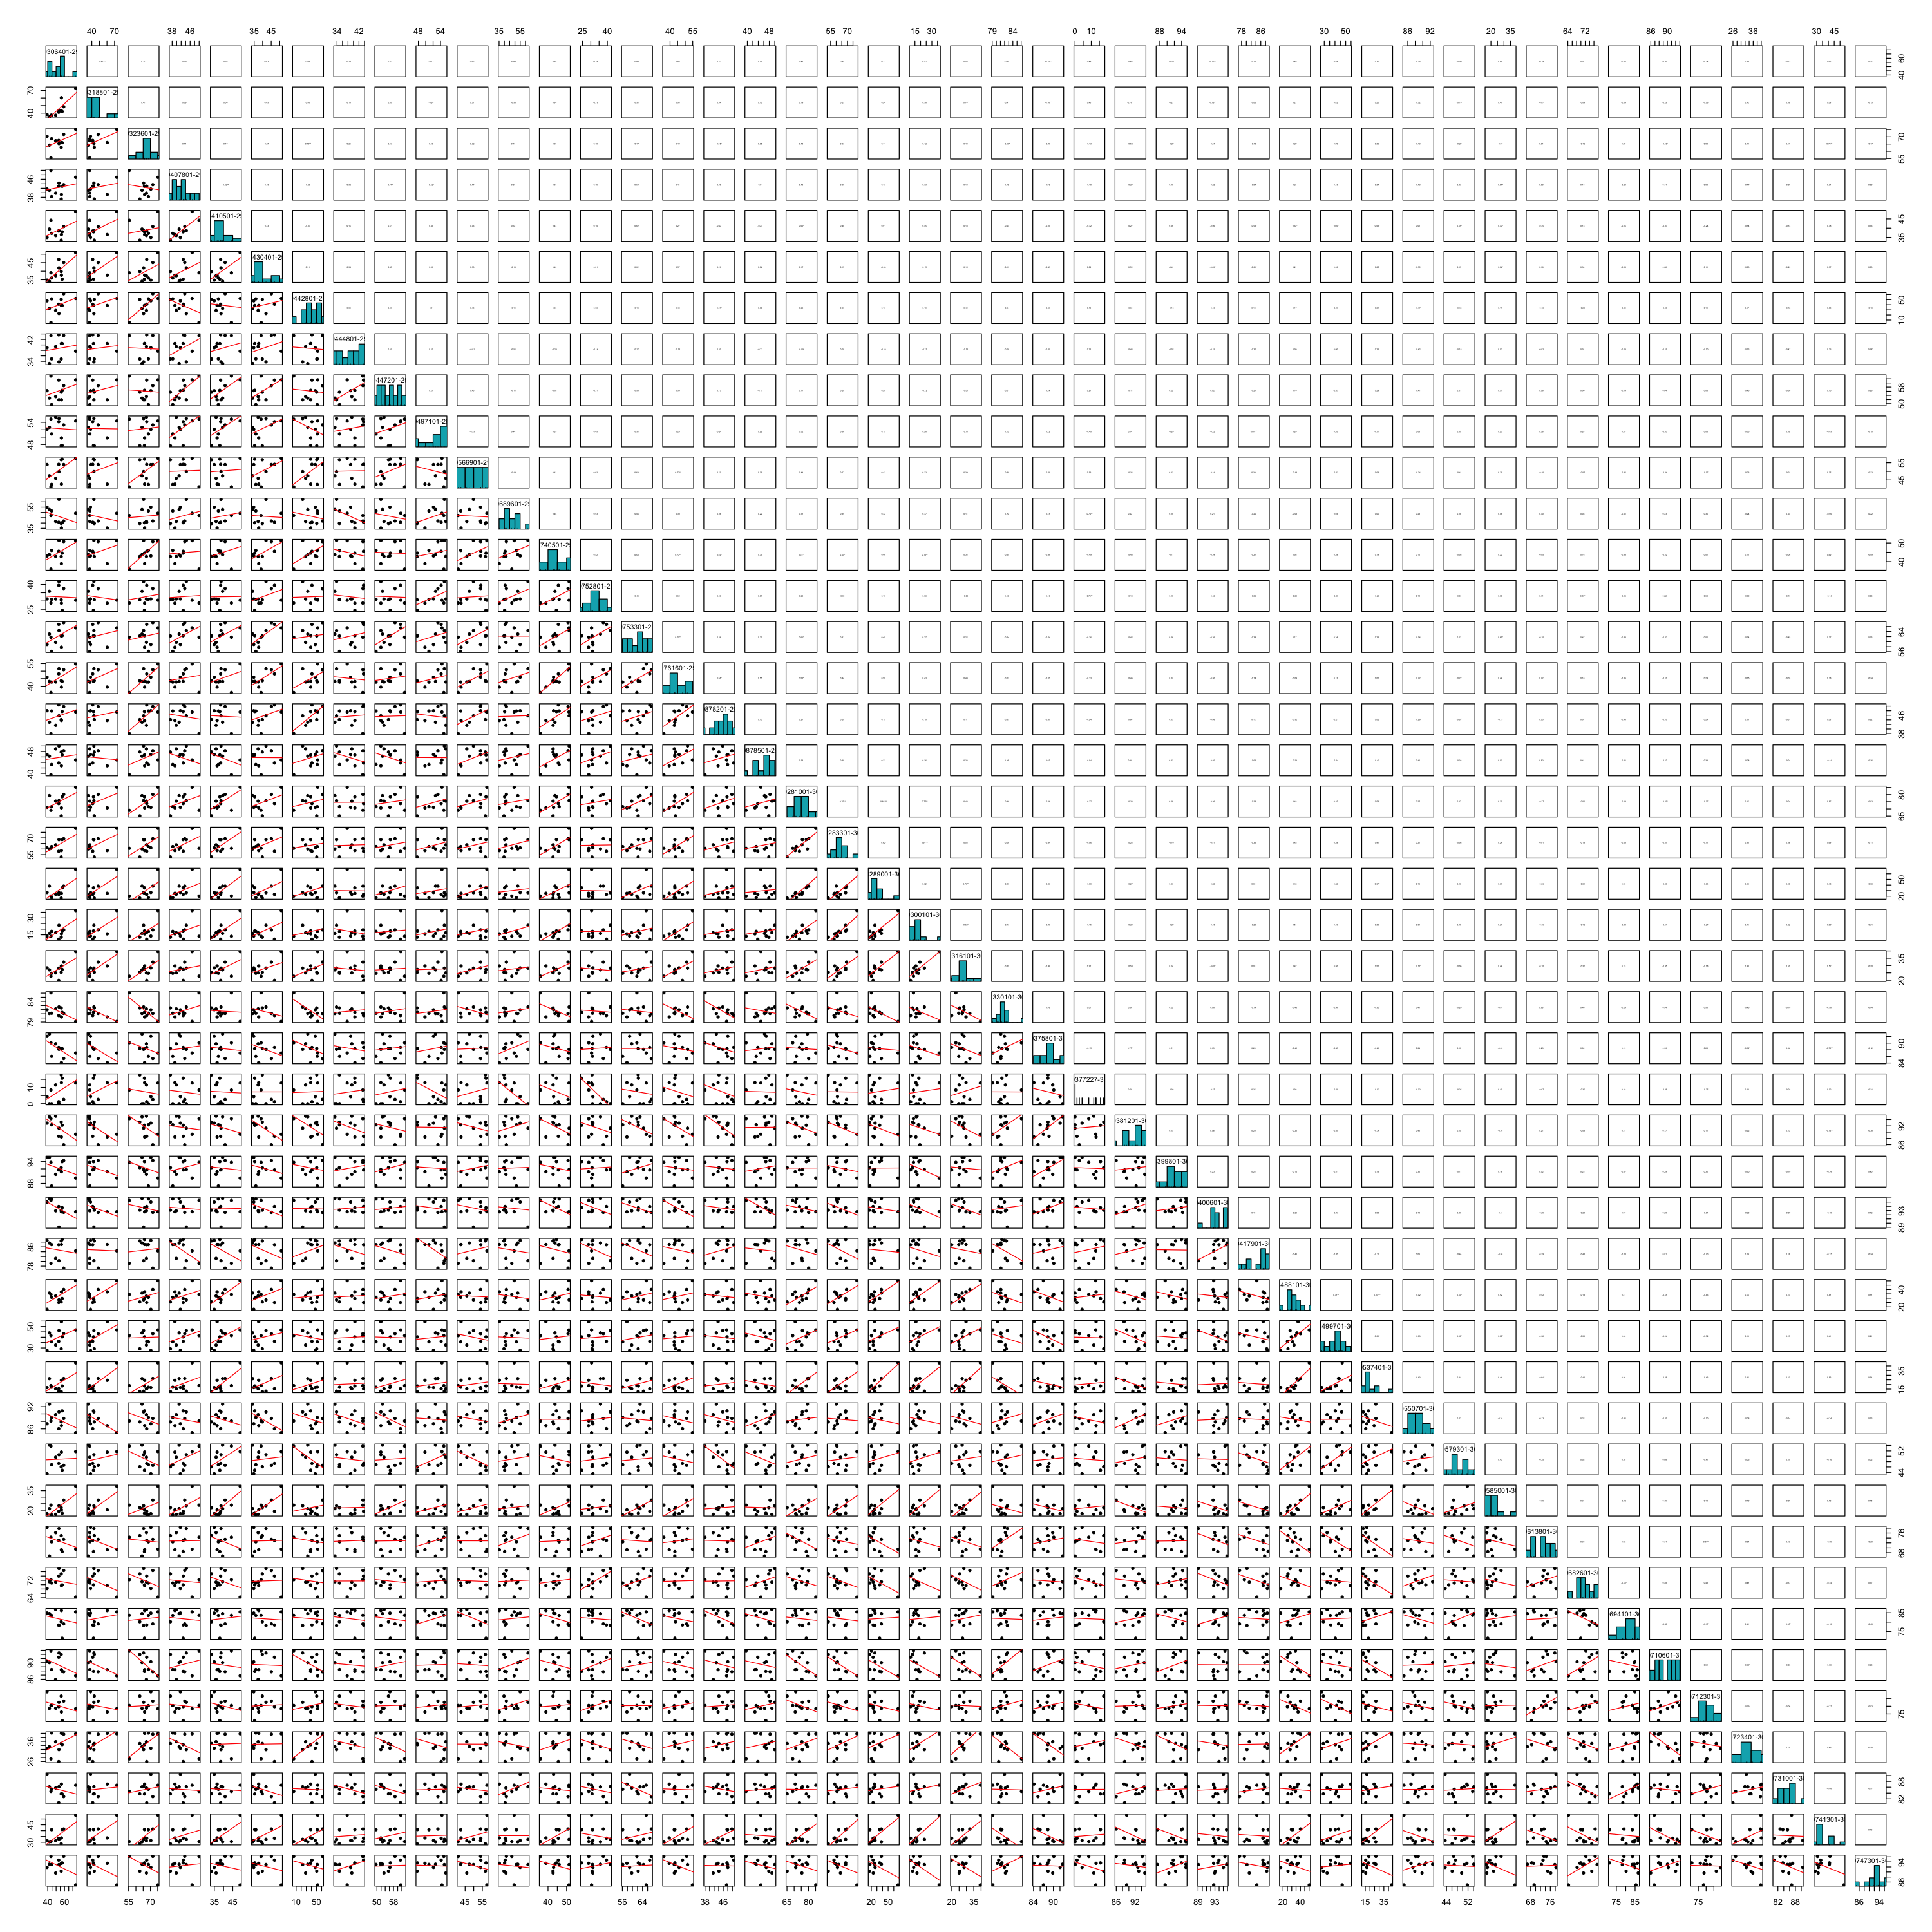

In [15]:

case_focus_region <- t(corsiv_methy_df_subset_chr_case[89:133,])
M_case<-cor(case_focus_region,use="complete.obs",method = "spearman")

control_focus_region <- t(corsiv_methy_df_subset_chr_control[89:133,])
M_control<-cor(control_focus_region,use="complete.obs",method = "spearma")

M_case[lower.tri(M_case,diag = T)] <-0
M_control[upper.tri(M_control,diag = T)] <-0
M <- M_control + M_case

corrplot(M,
         method = "square", tl.cex = 1, tl.col = 'black',
         diag = FALSE,tl.srt=45,addgrid.col = NA,is.corr = FALSE,cl.lim = c(-1,1),addCoef.col = "black",
         number.cex = 0.3,
         title = "Pearson : chr20:29306401-29307400 /n to chr20:30747301-30747500")

options(repr.plot.width=25, repr.plot.height=25)

pairs.panels(control_focus_region,
             smooth = F, scale = T,lm=T,cor = T,stars = T,
             method = "spearman", # correlation method
             hist.col = "#00AFBB",
             density = F,  # show density plots
             ellipses = F # show correlation ellipses,
)
